In [1]:
from IPython.core.display import HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
# Importing Libraries
import os
import cv2
from PIL import Image 
import numpy as np
from patchify import patchify
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import matplotlib.pyplot as plt
import random

# Part-1:

In [2]:

# gpus = tf.config.list_physical_devices('GPU')

# if gpus:
#     try:
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#             logical_gpus = tf.config.list_logical_devices('GPU')
#             print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#     except RuntimeError as e:
#         print(e)
        
# tf.device('/cpu:0')

In [3]:
import os
import cv2
from PIL import Image 
import numpy as np
from patchify import patchify
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import matplotlib.pyplot as plt
import random

In [4]:
minmaxscalar = MinMaxScaler()

In [5]:
dataset_root_folder = 'Semantic segmentation dataset'

In [6]:
image_dataset = []
mask_dataset = []


image_pathch_size = 256


for image_type in ['images', 'masks']:
    
    if image_type == 'images':
        image_extension = 'jpg'
        
    elif image_type == 'masks':
        image_extension = 'png'
    
    for tile_id in range(1, 9):
        for image_id in range(1, 20):
            image = cv2.imread(f'{dataset_root_folder}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}', 1)
            if image is not None:
                if image_type == 'masks':
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                #print(image.shape)
                size_x = (image.shape[0]//image_pathch_size)*image_pathch_size
                size_y = (image.shape[1]//image_pathch_size)*image_pathch_size

                #print(f'{image.shape}---------- {size_x}  -  {size_y}')
                image = Image.fromarray(image)
                image = image.crop((0,0, size_x, size_y))
                #print(f'{image.size[0]}, {image.size[1]}')
                image = np.array(image)
                patched_images = patchify(image, (image_pathch_size, image_pathch_size, 3), step = image_pathch_size)
                #print(len(patched_images))

                for i in range(patched_images.shape[0]):
                    for j in range(patched_images.shape[1]):
                        if image_type == 'images':
                            individual_pathced_image = patched_images[i,j,:,:]
                            #print(individual_pathced_image.shape)
                            individual_pathced_image = minmaxscalar.fit_transform(individual_pathced_image.reshape(-1, individual_pathced_image.shape[-1])).reshape(individual_pathced_image.shape)
                            individual_pathced_image = individual_pathced_image[0]
                            #print(individual_pathced_image)
                            image_dataset.append(individual_pathced_image)
                        elif image_type == 'masks':
                            individual_pathced_mask = patched_images[i,j,:,:]
                            individual_pathced_mask = individual_pathced_mask[0]
                            mask_dataset.append(individual_pathced_mask)
                        

In [7]:
print(len(image_dataset))
print(len(mask_dataset))

1305
1305


In [8]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [9]:
print(len(image_dataset))
print(len(mask_dataset))

1305
1305


921


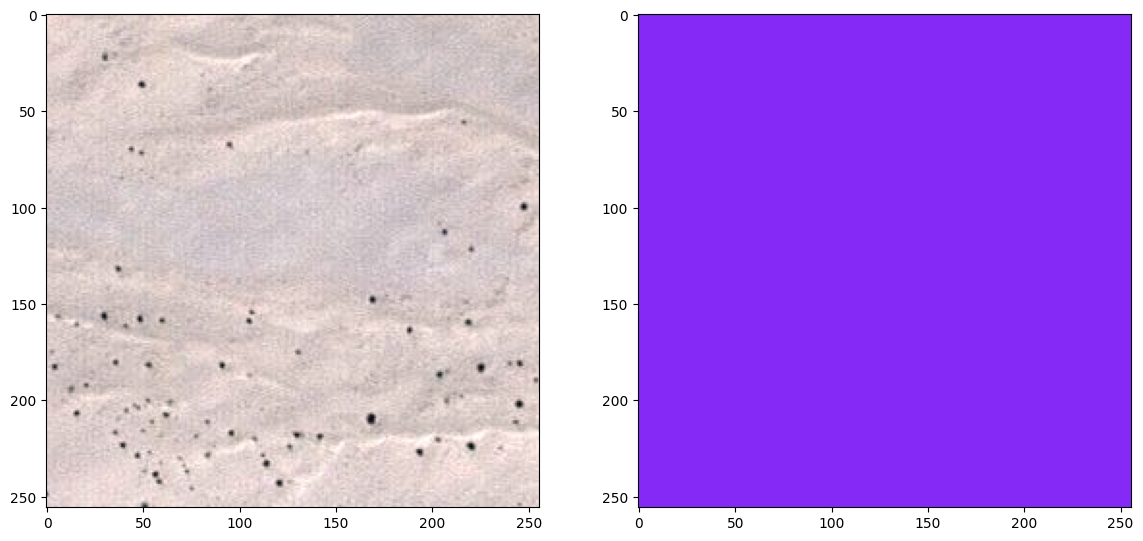

In [10]:
random_image_id = random.randint(0, len(image_dataset))
print(random_image_id)
plt.figure(figsize=(14,10))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

In [11]:
class_building  = '#3C1098'
class_building = class_building.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print(class_building)


class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)


class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)


class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)


[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [12]:
label = individual_pathced_mask

In [13]:
def rgb_to_label(label):
    label_segment = np.zeros(label.shape, dtype = np.uint8)
    label_segment[np.all(label == class_water, axis = -1)] = 0
    label_segment[np.all(label == class_land, axis = -1)] = 1
    label_segment[np.all(label == class_road, axis = -1)] = 2
    label_segment[np.all(label == class_building, axis = -1)] = 3
    label_segment[np.all(label == class_vegetation, axis = -1)] = 4
    label_segment[np.all(label == class_unlabeled, axis = -1)] = 5
    label_segment =  label_segment[:,:,0]
    return label_segment

In [14]:
labels = []
for i in range(mask_dataset.shape[0]):
    label = rgb_to_label(mask_dataset[i])
    labels.append(label)

In [15]:
labels = np.array(labels)

In [16]:
labels = np.expand_dims(labels, axis=3)

In [17]:
print(f'Total unique labels based on masks : {np.unique(labels)}')

Total unique labels based on masks : [0 1 2 3 4 5]


643


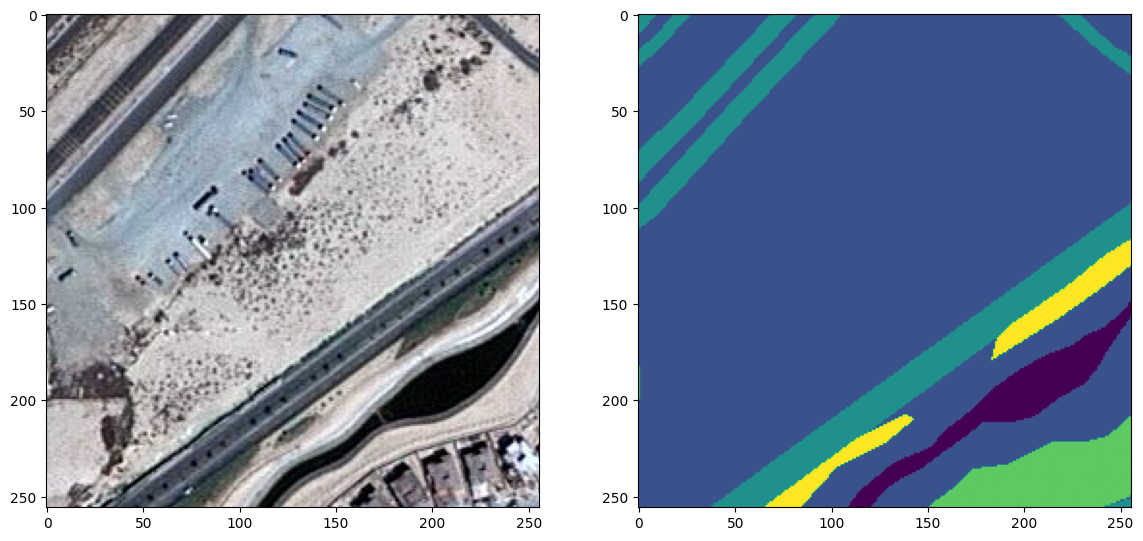

In [18]:
random_image_id = random.randint(0, len(image_dataset))
print(random_image_id)
plt.figure(figsize=(14,10))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
# plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

In [53]:
total_classes = len(np.unique(labels))

In [20]:
from tensorflow.keras.utils import to_categorical

In [21]:
labels_categorical_dataset =  to_categorical(labels, num_classes= total_classes)

In [22]:
labels_categorical_dataset.shape

(1305, 256, 256, 6)

1149


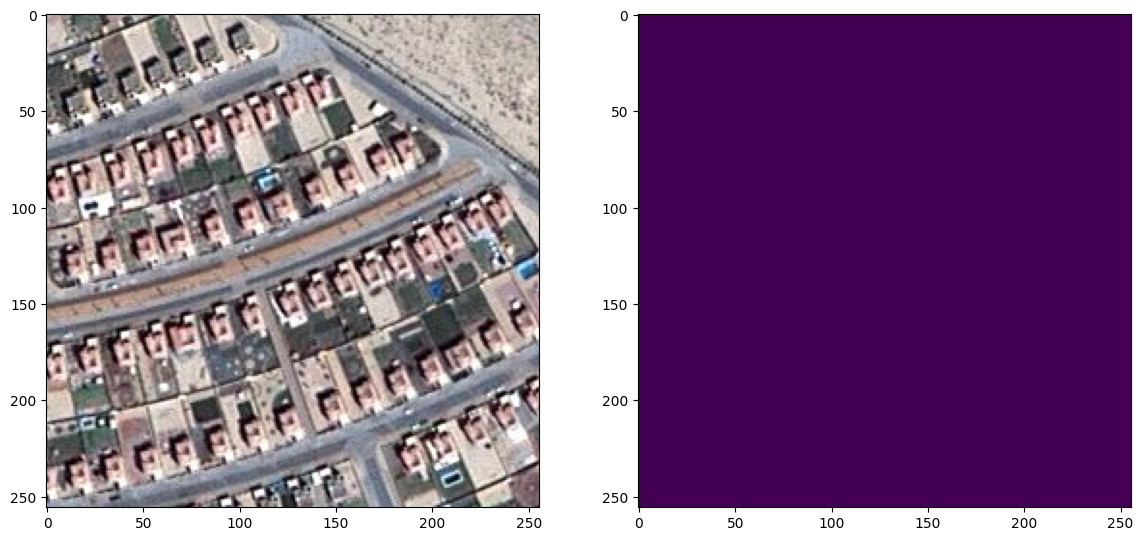

In [23]:
random_image_id = random.randint(0, len(image_dataset))
# random_image_id = 10
print(random_image_id)
plt.figure(figsize=(14,10))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
# plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels_categorical_dataset[random_image_id][:,:,0])

In [24]:
master_trainng_dataset = image_dataset

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(master_trainng_dataset, labels_categorical_dataset, test_size=0.15, random_state = 100)

In [27]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1109, 256, 256, 3)
(196, 256, 256, 3)
(1109, 256, 256, 6)
(196, 256, 256, 6)


In [50]:
np.save("Generated-Data/X_train.npy", x_train)
np.save("Generated-Data/y_train.npy", y_train)

np.save("Generated-Data/X_test.npy", x_test)
np.save("Generated-Data/y_test.npy", y_test)


In [28]:
image_height = x_train.shape[1]
image_width = x_train.shape[2]
image_channels = x_train.shape[3]
total_class = y_train.shape[3]

In [29]:
print(image_height)
print(image_width)
print(image_channels)
print(total_class)

256
256
3
6


# Part-2

In [1]:
# !wandb login eea5fc682582d28dc3efe1dd2b3651f3780491c1

In [2]:
# import wandb
# from wandb.keras import WandbCallback

In [3]:
# wandb.init(project='satellite-segmentation-dubai-images', entity = 'mddawladd')

In [7]:
# !wandb login --relogin eea5fc682582d28dc3efe1dd2b3651f3780491c1

wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\awlad/.netrc


In [4]:
# !wandb status

In [5]:
# Importing Libraries
import os
import cv2
from PIL import Image 
import numpy as np
from patchify import patchify
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import matplotlib.pyplot as plt
import random

In [6]:
os.environ["SM_FRAMEWORK"] = "tf.keras"

In [7]:
x_train = np.load('Generated-Data/X_train.npy')
y_train = np.load('Generated-Data/y_train.npy')

x_test = np.load('Generated-Data/X_test.npy')
y_test = np.load('Generated-Data/y_test.npy')

In [8]:
image_height = x_train.shape[1]
image_width = x_train.shape[2]
image_channels = x_train.shape[3]
total_class = y_train.shape[3]


In [9]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [10]:
from keras import backend as K

### Evaluation Metrics : Jaccard Index/Intersection over uninion(IoU)

In [11]:
def jaccard_coef(y_true, y_pred):
    y_true_flatten = K.flatten(y_true)
    y_pred_flatten = K.flatten(y_pred)
    intersection = K.sum(y_true_flatten * y_pred_flatten)
    final_coef_value = (intersection + 1.0)/ (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
    return final_coef_value
    

In [12]:
def multi_unet_model(n_classes = 5, image_height = 256, image_width = 256,image_channels = 1):
    inputs = Input([image_height, image_width, image_channels])
    source_input = inputs
    
    #First Block
    c1 = Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(source_input)
    c1 = Dropout(rate = 0.2)(c1)
    c1 = Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2,2))(c1)
    
    c2 = Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.2)(c2)
    c2 = Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2,2))(c2)
    
    
    c3 = Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2,2))(c3)
    
    
    c4 = Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D((2,2))(c4)
    
    c5 = Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.2)(c5)
    c5 = Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    
    u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(u6)
    c6 = Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
    
    
    u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)    
    
    
    u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.2)(c8)
    c8 = Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
    
    
    u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.2)(c8)
    c8 = Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
    
    
    
    u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis = 3)
    c9 = Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.2)(c9)
    c9 = Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
        
    outputs = Conv2D(n_classes, (1,1), activation='softmax')(c9)
    
    model = Model(inputs = [inputs], outputs = [outputs])
    return model
    

In [13]:
metrics = ['accuracy', jaccard_coef]

In [14]:
def get_deep_learning_model(total_classes = 5, image_height = 256, image_width = 256, image_channels  = 3):
    return multi_unet_model(n_classes=total_class,
                            image_height = image_height,
                            image_width = image_width,
                            image_channels = image_channels)

In [15]:
model = get_deep_learning_model()

In [16]:
# Model Configration 
# model.get_config()

### Generating Loss Functions

* dice loss > Focal Loss > Total Loss
* Total Loss = (Dice Loss + (1*Focal Loss)

In [17]:
weights = [0.166, 0.166, 0.166, 0.166, 0.166, 0.166]

In [18]:
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [19]:
dice_loss = sm.losses.DiceLoss(class_weights = weights)

In [20]:
focal_loss = sm.losses.CategoricalFocalLoss()

In [21]:
total_loss = dice_loss + (1*focal_loss)

In [22]:
total_loss

### Model Compilation

In [ ]:
import tensorflow as tf 

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model.compile(optimizer='adam', loss = total_loss, metrics= metrics)

In [ ]:
model.summary()

In [ ]:
# from tensorflow.keras.utils import plot_model

In [ ]:
# plot_model(model, to_file='satelite_model_plot.png', show_shapes=True, show_layer_names=True, dpi=1000)

In [ ]:
from tensorflow.keras.utils import Sequence
import numpy as np   

class DataGenerator(Sequence):
    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        return batch_x, batch_y


train_gen = DataGenerator(x_train, y_train, 16)
test_gen = DataGenerator(x_test, y_test, 16)

In [34]:
import keras
from IPython.display import clear_output
%matplotlib inline

In [35]:
class PlotLoss(keras.callbacks.Callback):
    def on_train_begin(self, logs = {}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.jaccard_coef = []
        self.val_jaccard_coef = []
        self.fig = plt.figure()
        self.logs = []
        
    def on_epoch_end(self, epoch, logs = {}):
        self.logs.append(logs)
        self.x.append(self.i)
        
#         self.losses.append(logs.get('loss'))
#         self.val_losses.append(logs.get('val_loss'))

        self.jaccard_coef.append(logs.get('jaccard_coef'))
        self.val_jaccard_coef.append(logs.get('val_jaccard_coef'))
        
        
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.jaccard_coef, label = 'jaccard_coef')
        plt.plot(self.x, self.val_jaccard_coef, label = 'val_jaccard_coef')
        plt.legend()
        plt.show();
plot_loss = PlotLoss()

In [36]:
class PlotLossEx(keras.callbacks.Callback):
    def on_train_begin(self, logs = {}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.jaccard_coef = []
        self.val_jaccard_coef = []
        self.fig = plt.figure()
        self.logs = []
        
    def on_epoch_end(self, epoch, logs = {}):
        self.logs.append(logs)
        self.x.append(self.i)
        
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))

        self.jaccard_coef.append(logs.get('jaccard_coef'))
        self.val_jaccard_coef.append(logs.get('val_jaccard_coef'))
        
        
        self.i += 1
        
        plt.figure(figsize=(14,8))
        f,(graph1, graph2) = plt.subplots(1,2, sharex=True)
        
        clear_output(wait=True)
        
        graph1.set_yscale('log')
        graph1.plot(self.x, self.losses, label = 'loss')
        graph1.plot(self.x, self.val_losses, label = 'val_losses')
        graph1.legend()
        
        graph2.set_yscale('log')
        graph2.plot(self.x, self.jaccard_coef, label = 'jaccard_coef')
        graph2.plot(self.x, self.val_jaccard_coef, label = 'val_jaccard_coef')
        graph2.legend()
        
        plt.show();
plot_loss = PlotLossEx()

In [37]:
model_history = model.fit(train_gen, 
                         batch_size=16,
                         epochs = 100,
                         verbose = 1,
                         validation_data=test_gen,
                         #callbacks=[WandbCallback()],
                         shuffle=False)

Epoch 1/100
70/70 [==============================] - 22s 309ms/step - loss: 0.9973 - accuracy: 0.5826 - jaccard_coef: 0.2571 - val_loss: 0.9696 - val_accuracy: 0.6750 - val_jaccard_coef: 0.4183
Epoch 2/100
70/70 [==============================] - 18s 264ms/step - loss: 0.9642 - accuracy: 0.7030 - jaccard_coef: 0.4439 - val_loss: 0.9582 - val_accuracy: 0.7243 - val_jaccard_coef: 0.4668
Epoch 3/100
70/70 [==============================] - 19s 265ms/step - loss: 0.9568 - accuracy: 0.7331 - jaccard_coef: 0.4897 - val_loss: 0.9549 - val_accuracy: 0.7346 - val_jaccard_coef: 0.5158
Epoch 4/100
70/70 [==============================] - 18s 264ms/step - loss: 0.9499 - accuracy: 0.7564 - jaccard_coef: 0.5265 - val_loss: 0.9530 - val_accuracy: 0.7389 - val_jaccard_coef: 0.5354
Epoch 5/100
70/70 [==============================] - 18s 264ms/step - loss: 0.9435 - accuracy: 0.7744 - jaccard_coef: 0.5569 - val_loss: 0.9487 - val_accuracy: 0.7608 - val_jaccard_coef: 0.5680
Epoch 6/100
70/70 [===========

70/70 [==============================] - 16s 233ms/step - loss: 0.8939 - accuracy: 0.8888 - jaccard_coef: 0.7654 - val_loss: 0.9149 - val_accuracy: 0.8570 - val_jaccard_coef: 0.7345
Epoch 44/100
70/70 [==============================] - 16s 233ms/step - loss: 0.8940 - accuracy: 0.8883 - jaccard_coef: 0.7646 - val_loss: 0.9145 - val_accuracy: 0.8543 - val_jaccard_coef: 0.7241
Epoch 45/100
70/70 [==============================] - 16s 233ms/step - loss: 0.8934 - accuracy: 0.8910 - jaccard_coef: 0.7693 - val_loss: 0.9145 - val_accuracy: 0.8602 - val_jaccard_coef: 0.7422
Epoch 46/100
70/70 [==============================] - 16s 233ms/step - loss: 0.8894 - accuracy: 0.8980 - jaccard_coef: 0.7833 - val_loss: 0.9163 - val_accuracy: 0.8584 - val_jaccard_coef: 0.7384
Epoch 47/100
70/70 [==============================] - 16s 233ms/step - loss: 0.8883 - accuracy: 0.8989 - jaccard_coef: 0.7852 - val_loss: 0.9165 - val_accuracy: 0.8566 - val_jaccard_coef: 0.7359
Epoch 48/100
70/70 [==================

70/70 [==============================] - 17s 238ms/step - loss: 0.8754 - accuracy: 0.9263 - jaccard_coef: 0.8387 - val_loss: 0.9153 - val_accuracy: 0.8640 - val_jaccard_coef: 0.7508
Epoch 86/100
70/70 [==============================] - 17s 237ms/step - loss: 0.8763 - accuracy: 0.9255 - jaccard_coef: 0.8374 - val_loss: 0.9152 - val_accuracy: 0.8647 - val_jaccard_coef: 0.7541
Epoch 87/100
70/70 [==============================] - 16s 229ms/step - loss: 0.8810 - accuracy: 0.9152 - jaccard_coef: 0.8165 - val_loss: 0.9148 - val_accuracy: 0.8634 - val_jaccard_coef: 0.7496
Epoch 88/100
70/70 [==============================] - 16s 225ms/step - loss: 0.8794 - accuracy: 0.9185 - jaccard_coef: 0.8223 - val_loss: 0.9177 - val_accuracy: 0.8617 - val_jaccard_coef: 0.7500
Epoch 89/100
70/70 [==============================] - 16s 226ms/step - loss: 0.8776 - accuracy: 0.9223 - jaccard_coef: 0.8313 - val_loss: 0.9138 - val_accuracy: 0.8670 - val_jaccard_coef: 0.7567
Epoch 90/100
70/70 [==================

In [40]:
# wandb.log({'accuracy': jaccard_coef, 'loss': total_loss})

In [41]:
# wandb.config.dropout = 0.2

In [38]:
history_a = model_history

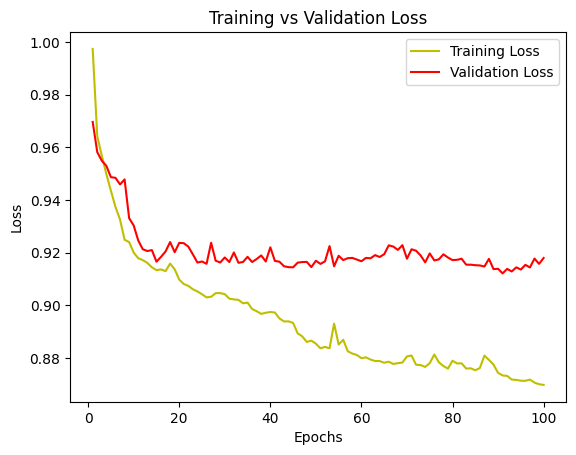

In [39]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

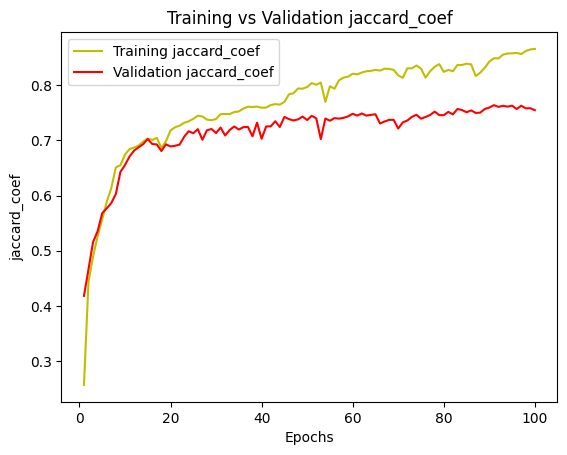

In [40]:
jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']
epochs = range(1, len(jaccard_coef) + 1)
plt.plot(epochs, jaccard_coef, 'y', label = 'Training jaccard_coef')
plt.plot(epochs, val_jaccard_coef, 'r', label = 'Validation jaccard_coef')
plt.title('Training vs Validation jaccard_coef')
plt.xlabel('Epochs')
plt.ylabel('jaccard_coef')
plt.legend()
plt.show()

In [41]:
model_history.params

{'verbose': 1, 'epochs': 100, 'steps': 70}

In [42]:
y_pred = model.predict(x_test)

7/7 [==============================] - 4s 104ms/step


In [43]:
len(y_pred)

196

In [44]:
y_pred_argmax = np.argmax(y_pred, axis = 3)

In [45]:
y_pred_argmax

array([[[1, 1, 1, ..., 4, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [4, 4, 4, ..., 1, 1, 1],
        [4, 4, 4, ..., 1, 1, 1],
        [4, 4, 4, ..., 1, 1, 1]],

       [[4, 4, 4, ..., 3, 3, 1],
        [4, 4, 4, ..., 3, 3, 3],
        [4, 4, 4, ..., 3, 3, 3],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 

In [46]:
y_test_argmax = np.argmax(y_test, axis = 3)

In [47]:
test_image_number = 10

test_image = x_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis = 3)
predicted_image = predicted_image[0,:,:]

1/1 [==============================] - 1s 919ms/step


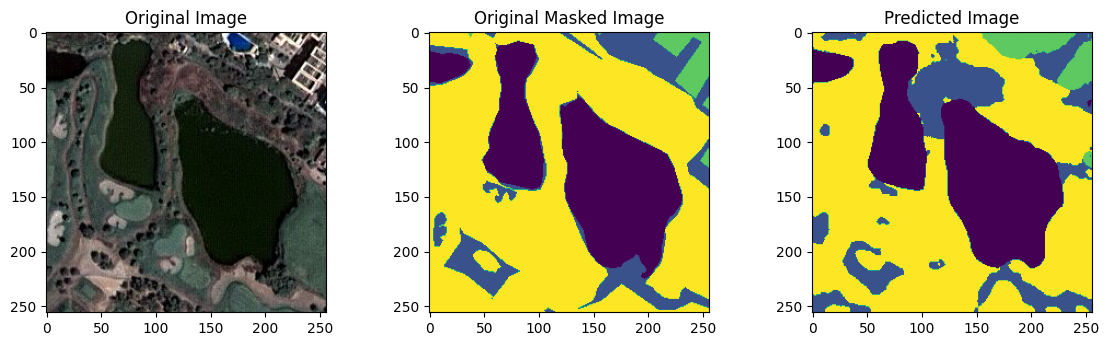

In [48]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)

plt.subplot(232)
plt.title("Original Masked Image")
plt.imshow(ground_truth_image)

plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)

plt.show()

In [49]:
# model.save('Satelite_segmentation_full.h5')

### Model Saving and Reloading( With Custom Loss)

In [49]:
model.save('satellite-imagery.h5')

In [51]:
from keras.models import load_model

In [56]:
saved_model = load_model('satellite-imagery.h5', 
                         custom_objects={'dice_loss_plus_1focal_loss': total_loss, 'jaccard_coef': jaccard_coef})

In [54]:
model.loss.name

'dice_loss_plus_1focal_loss'

### Comparing Prediciton Results 

* Using images using mask and predicted result images..

In [57]:
import random 

In [58]:
test_image_number = random.randint(0, len(x_test))

test_image = x_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

# prediction = model.predict(test_image_input)
prediction = saved_model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis = 3)
predicted_image = predicted_image[0,:,:]

1/1 [==============================] - 0s 195ms/step


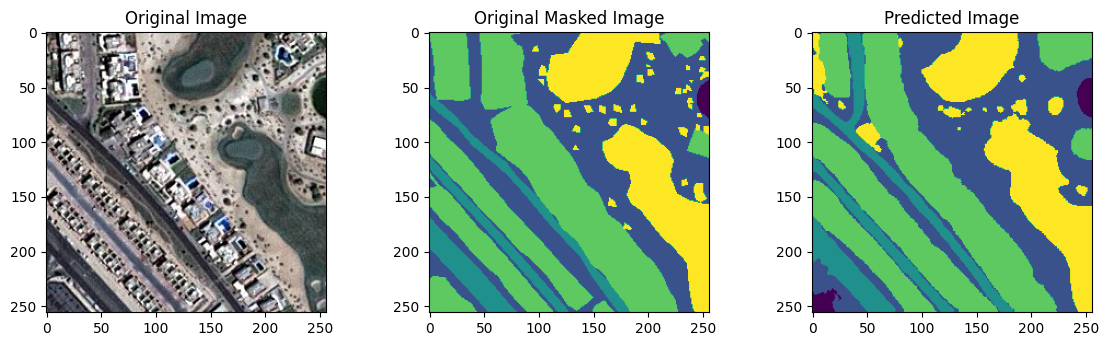

In [59]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)

plt.subplot(232)
plt.title("Original Masked Image")
plt.imshow(ground_truth_image)

plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)

plt.show()

### Performing Prediction using the custom image from Google Map

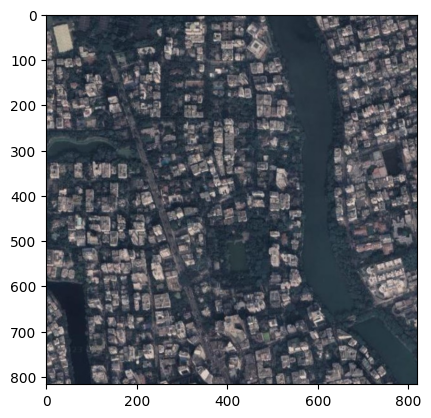

In [79]:
plt.imshow(Image.open('sample-data/fc-image-01.jpg'))

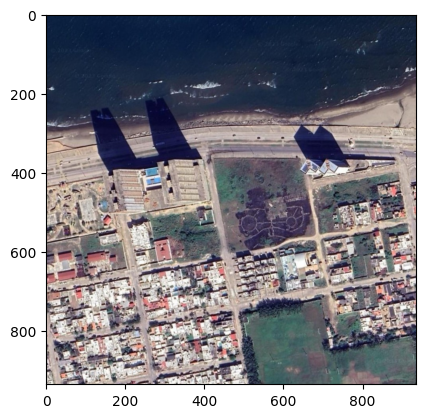

In [80]:
plt.imshow(Image.open('sample-data/fc-image-02.jpg'))

In [87]:
image = Image.open('sample-data/fc-image-01.jpg')
image = image.resize((256,256))
image = np.array(image)
image = np.expand_dims(image, 0)

In [88]:
image.shape

(1, 256, 256, 3)

In [89]:
prediction = saved_model.predict(image)

1/1 [==============================] - 0s 20ms/step


In [90]:
predicted_image = np.argmax(prediction, axis = 3)
predicted_image = predicted_image[0,:,:]

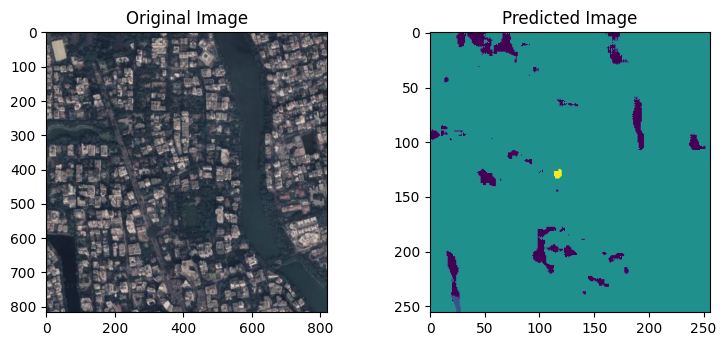

In [91]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(Image.open('sample-data/fc-image-01.jpg'))


plt.subplot(232)
plt.title("Predicted Image")
plt.imshow(predicted_image)

plt.show()

In [93]:
import keract as ke

In [95]:
activations = ke.get_activations(saved_model, image, nodes_to_evaluate=None, output_format='simple', auto_compile=True)

In [97]:
ke.display_activations(activations, cmap = 'viridis', save = True, directory='activations')

input_1 (1, 256, 256, 3) 
conv2d (1, 256, 256, 16) 
dropout (1, 256, 256, 16) 
conv2d_1 (1, 256, 256, 16) 
max_pooling2d (1, 128, 128, 16) 
conv2d_2 (1, 128, 128, 32) 
dropout_1 (1, 128, 128, 32) 
conv2d_3 (1, 128, 128, 32) 
max_pooling2d_1 (1, 64, 64, 32) 
conv2d_4 (1, 64, 64, 64) 
dropout_2 (1, 64, 64, 64) 
conv2d_5 (1, 64, 64, 64) 
max_pooling2d_2 (1, 32, 32, 64) 
conv2d_6 (1, 32, 32, 128) 
dropout_3 (1, 32, 32, 128) 
conv2d_7 (1, 32, 32, 128) 
max_pooling2d_3 (1, 16, 16, 128) 
conv2d_8 (1, 16, 16, 256) 
dropout_4 (1, 16, 16, 256) 
conv2d_9 (1, 16, 16, 256) 
conv2d_transpose (1, 32, 32, 128) 
concatenate (1, 32, 32, 256) 
dropout_5 (1, 32, 32, 256) 
conv2d_11 (1, 32, 32, 128) 
conv2d_transpose_1 (1, 64, 64, 64) 
concatenate_1 (1, 64, 64, 128) 
conv2d_12 (1, 64, 64, 64) 
dropout_6 (1, 64, 64, 64) 
conv2d_13 (1, 64, 64, 64) 
conv2d_transpose_3 (1, 128, 128, 32) 
concatenate_3 (1, 128, 128, 64) 
conv2d_16 (1, 128, 128, 32) 
dropout_8 (1, 128, 128, 32) 
conv2d_17 (1, 128, 128, 32) 
conv

In [99]:
image = Image.open('sample-data/fc-image-01.jpg')
image = image.resize((256,256))
image_as_array = np.array(image)
image_as_array = image_as_array.astype(np.float32)
ke.display_heatmaps(activations, image_as_array, save=True, directory='heatmaps')

input_1 (1, 256, 256, 3) 
conv2d (1, 256, 256, 16) 
dropout (1, 256, 256, 16) 
conv2d_1 (1, 256, 256, 16) 
max_pooling2d (1, 128, 128, 16) 
conv2d_2 (1, 128, 128, 32) 
dropout_1 (1, 128, 128, 32) 
conv2d_3 (1, 128, 128, 32) 
max_pooling2d_1 (1, 64, 64, 32) 
conv2d_4 (1, 64, 64, 64) 
dropout_2 (1, 64, 64, 64) 
conv2d_5 (1, 64, 64, 64) 
max_pooling2d_2 (1, 32, 32, 64) 
conv2d_6 (1, 32, 32, 128) 
dropout_3 (1, 32, 32, 128) 
conv2d_7 (1, 32, 32, 128) 
max_pooling2d_3 (1, 16, 16, 128) 
conv2d_8 (1, 16, 16, 256) 
dropout_4 (1, 16, 16, 256) 
conv2d_9 (1, 16, 16, 256) 
conv2d_transpose (1, 32, 32, 128) 
concatenate (1, 32, 32, 256) 
dropout_5 (1, 32, 32, 256) 
conv2d_11 (1, 32, 32, 128) 
conv2d_transpose_1 (1, 64, 64, 64) 
concatenate_1 (1, 64, 64, 128) 
conv2d_12 (1, 64, 64, 64) 
dropout_6 (1, 64, 64, 64) 
conv2d_13 (1, 64, 64, 64) 
conv2d_transpose_3 (1, 128, 128, 32) 
concatenate_3 (1, 128, 128, 64) 
conv2d_16 (1, 128, 128, 32) 
dropout_8 (1, 128, 128, 32) 
conv2d_17 (1, 128, 128, 32) 
conv